### Team 5 Final Project (ADS500B)

Role: real estate
Modeling Problem: Regression, predicting housing prices (y), independent/exploratory/predictor variables (x, 16 attributes)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os

In [2]:
# create a pandas dataframe from csv
housing_data = pd.read_csv('house_sales.csv', header=0, sep=',')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# drop rows unneccesary to analysis
housing_data.drop("id", axis = 1, inplace=True)

In [4]:
# remove string from date column
housing_data['date'] = housing_data['date'].str.replace('T000000', '', regex=True)
# convert date column to datetime type
housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housing_data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [6]:
housing_data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [7]:
# identifying missing values in the 4 columns
housing_data.isnull().sum()

date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

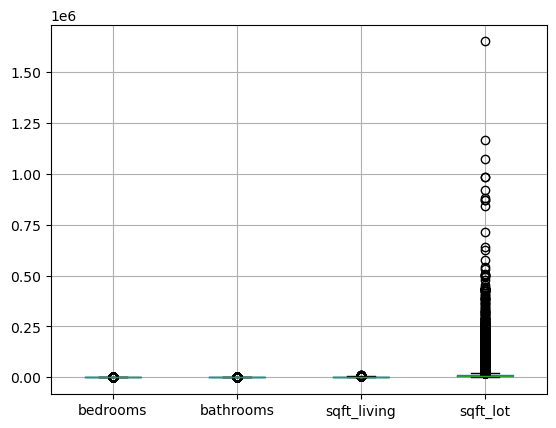

In [8]:
%matplotlib inline
impute_columns = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot']

housing_data[impute_columns].boxplot()
plt.show()

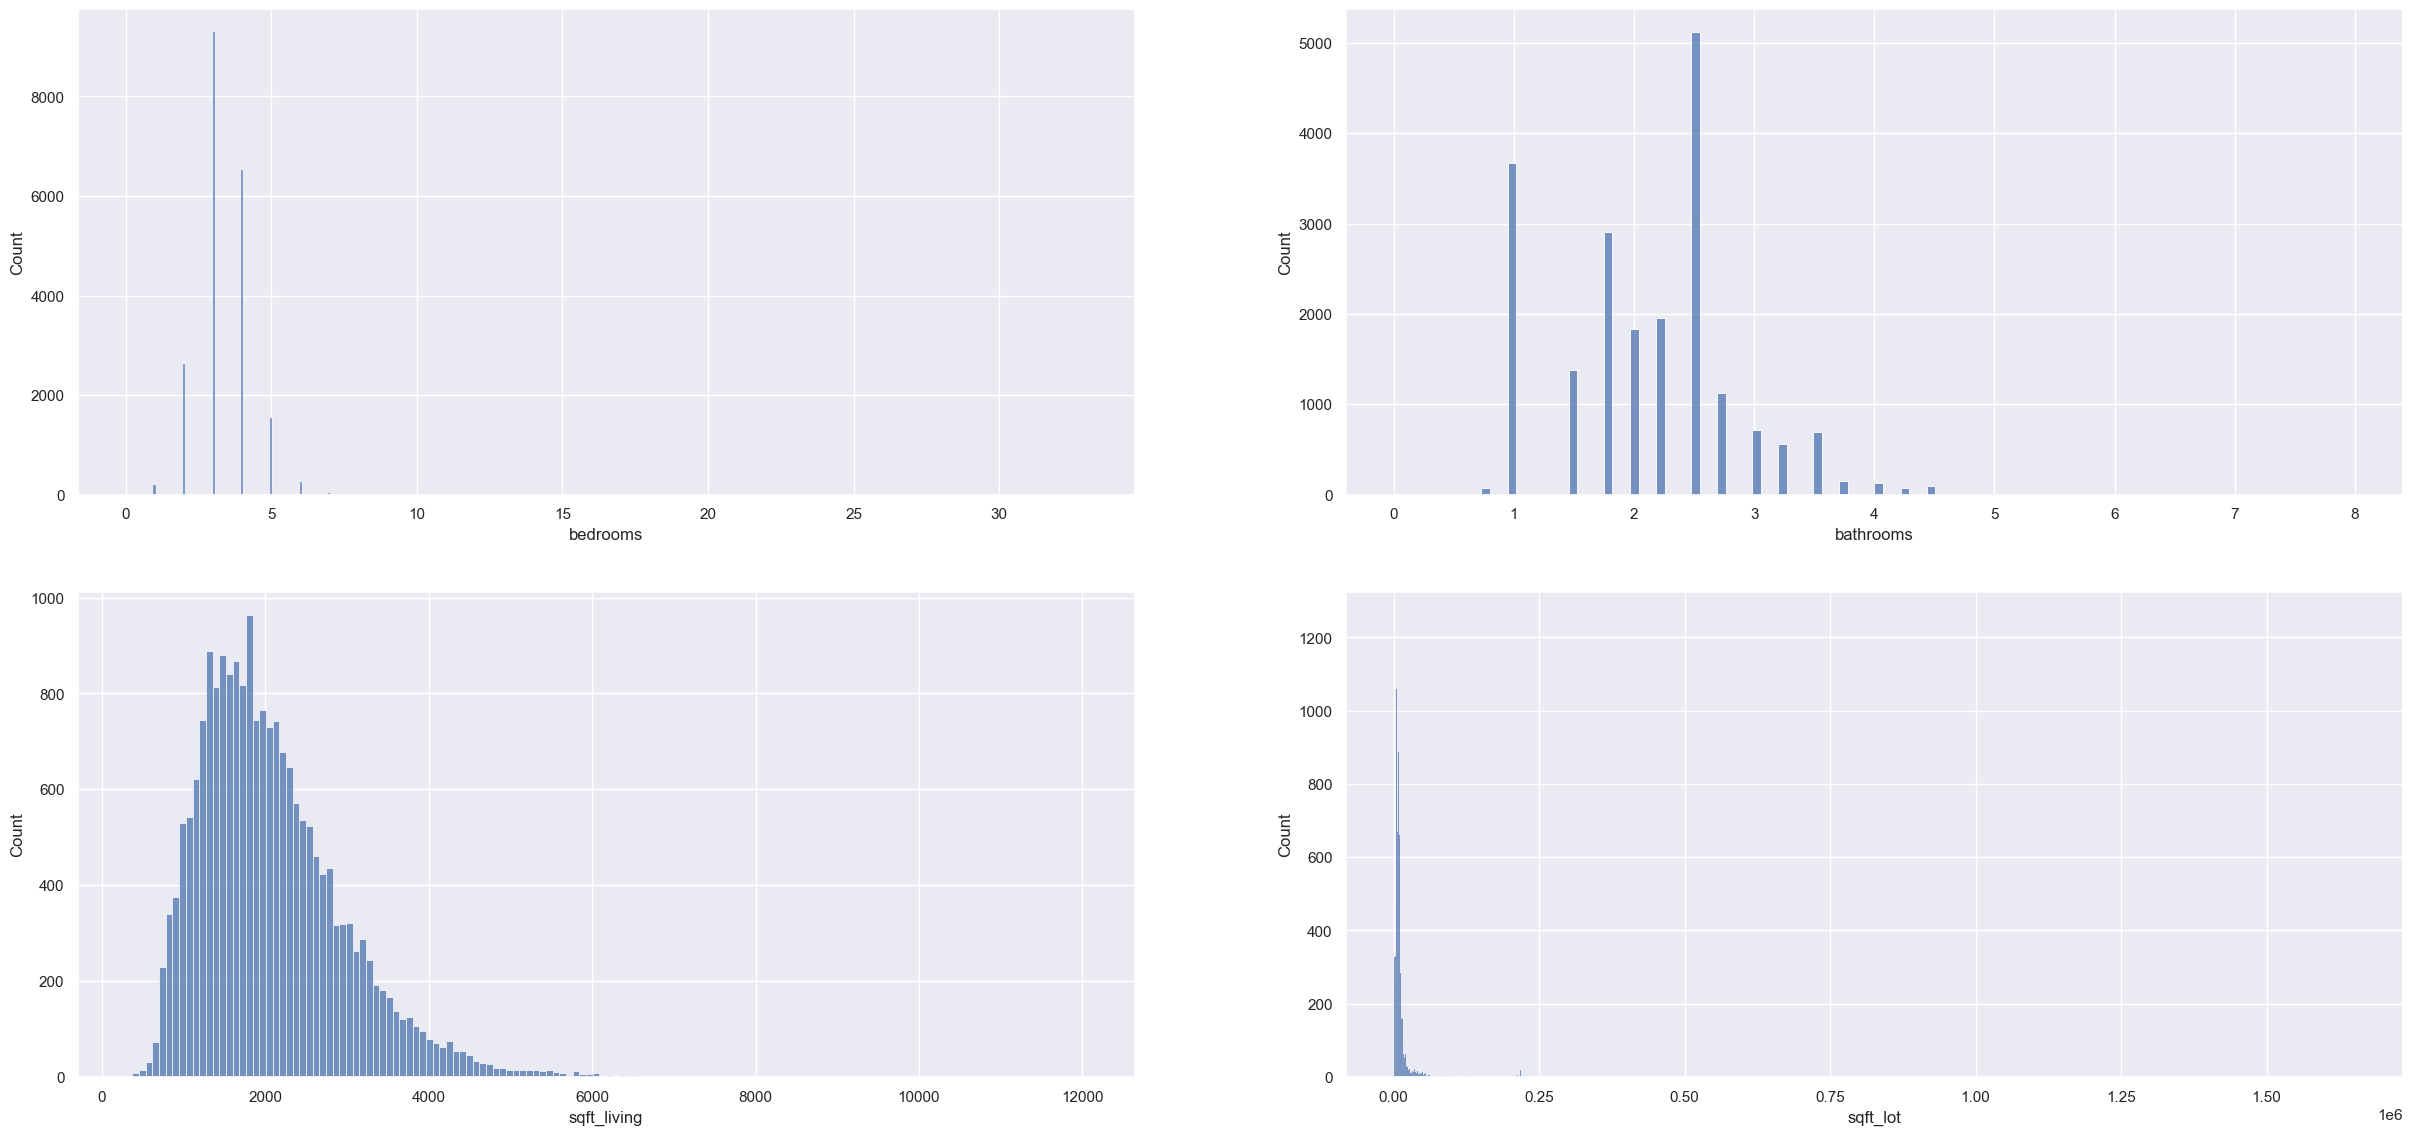

In [9]:
import seaborn as sns
sns.set(style='darkgrid',palette="deep")

h = plt.figure(figsize=(30,150))
c = 0
for i in impute_columns:    
    h.add_subplot(20, 2, c+1)
    sns.histplot(housing_data[impute_columns][i])
    c=c+1
plt.show()

In [10]:
housing_data[impute_columns].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot
count,20479.000000,20545.000000,20503.000000,2.056900e+04
mean,3.372821,2.113507,2081.073697,1.517982e+04
std,0.930711,0.768913,915.043176,4.148617e+04
min,0.000000,0.000000,290.000000,5.200000e+02
25%,3.000000,1.500000,1430.000000,5.040000e+03
50%,3.000000,2.250000,1920.000000,7.620000e+03
75%,4.000000,2.500000,2550.000000,1.070800e+04
max,33.000000,8.000000,12050.000000,1.651359e+06


In [11]:
# replace null values of `bedrooms` with the mean of the `bedrooms` column
mean_bed=housing_data['bedrooms'].mean()
housing_data['bedrooms'].replace(np.nan,mean_bed, inplace=True)

# replace null values of `bathrooms` with the mean of the `bathrooms` column
mean_bath=housing_data['bathrooms'].mean()
housing_data['bathrooms'].replace(np.nan,mean_bath, inplace=True)

# replace null values of `sqft_living` with the values of `sqft_living15` column
housing_data['sqft_living'].fillna(housing_data['sqft_living15'], inplace=True)

# replace null values of `sqft_lot` with the values of `sqft_lot15` column
housing_data['sqft_lot'].fillna(housing_data['sqft_lot15'], inplace=True)

# identifying missing values remaining
housing_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

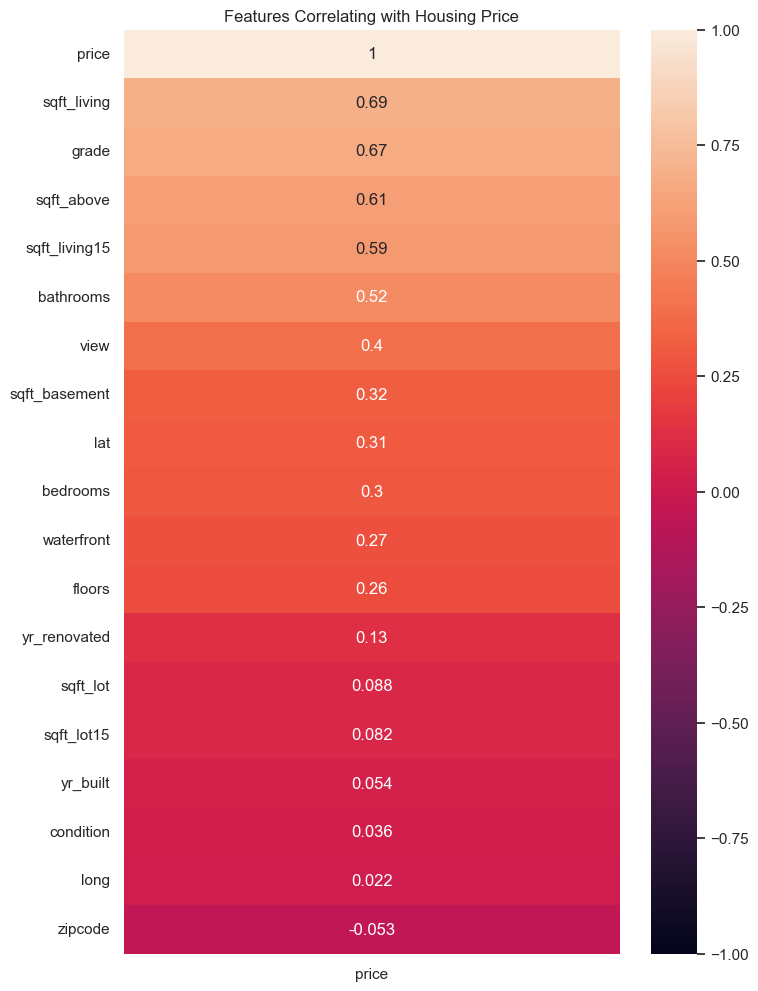

In [12]:
# numeric only
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(housing_data.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Housing Price');

Features with moderate correlation: sqft_living, grade, sqft_above, sqft_living15, bathrooms. However, sqft_above and sqft_living15 will be removed for the final model as they may have multicollinearity concerns with sqft_living.

## Build Models

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

# predictor variables
housing_features = ['sqft_living', 'grade', 'bathrooms']

# response variable
housing_price = 'price'

# fit a linear regression model to predict 'price' with housing features
Y = housing_data['price']
lm1 = LinearRegression()
lm1.fit(housing_data[housing_features], Y)

print("predicted values: " + str(lm1.predict(housing_data[housing_features])))
print("R^2: " + str(lm1.score(housing_data[housing_features], Y)))

predicted values: [324748.10307956 561536.14063613 140439.19463344 ... 299881.62998458
 477183.1577607  299881.62998458]
R^2: 0.5296360776061554


In [14]:
import statsmodels.api as sm
from statsmodels.api import OLS
X1 = sm.add_constant(housing_data[housing_features])
X1_results = OLS(Y,X1).fit()
X1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     8111.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:24:00   Log-Likelihood:            -2.9945e+05
No. Observations:               21613   AIC:                         5.989e+05
Df Residuals:                   21609   BIC:                         5.989e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.208e+05   1.33e+04    -46.692      0.000   -6.47e+05   -5.95e+05
sqft_living   190.6028      3.306     57.652      0.000     184.123     197.083
grade        1.062e+05   2299.044     46.176      0.000    1.02e+05    1.11e+05
bathrooms   -2.252e+04   3404.335     -6.615      0.000   -2.92e+04   -1.58e+04
==============================================================================
Omnibus:                    17900.367   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1360551.050
Skew:                           3.512   Prob(JB):                         0.00
Kurtosis:                      41.229   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting price using three housing features including `sqft_living`, `grade`, and `bathrooms`.

### Linear Regression on training sets

In [15]:
from sklearn.model_selection import train_test_split

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(housing_data[housing_features], Y, test_size=0.25, random_state=1)



# get the shape of train and test sets
train_shape = X_train.shape[0]
test_shape = X_test.shape[0]
X_shape = housing_data[housing_features].shape[0]

# proportion of train and test sets
train_percent = train_shape/X_shape
test_percent = test_shape/X_shape

print('Train Size:', 100*round(train_percent, 2),'%')
print('Test Size:', 100*round(test_percent, 2), '%')

Train Size: 75.0 %
Test Size: 25.0 %


### Train model to predict `price`.

In [16]:
# fit a linear regression model to predict 'price' with training dataset
# Y = housing_data['price']
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

Linear Regression is the machine learning algorithim. Specify set (train or test) and specify which variables (x or y).

In [17]:
# apply LR model to make prediction on training set
y_lm2_train_pred = lm2.predict(X_train)

# evaluate performance of LR algorithm
y_lm2_test_pred = lm2.predict(X_test)

In [18]:
# display predictions
y_lm2_train_pred

array([ 297434.07037316,  570983.02620036,  718286.85701053, ...,
        562976.50123361,  448027.7813125 , 1051763.77156118])

In [19]:
y_lm2_test_pred

array([796409.6192291 , 382818.74158648, 957808.13921614, ...,
       768899.23863027, 231799.05281602, 431131.65707316])

Compare predicted values vs actual values.

In [20]:
# evaluate model performance
y_train

8918      290000.0
5891      345950.0
15604     700000.0
5469      450000.0
3745      740000.0
           ...    
10955     571000.0
17289    1350000.0
5192      650000.0
12172     437000.0
235      1025000.0
Name: price, Length: 16209, dtype: float64

In [21]:
y_lm2_train_pred

array([ 297434.07037316,  570983.02620036,  718286.85701053, ...,
        562976.50123361,  448027.7813125 , 1051763.77156118])

Comparing predicted and actual values

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# compare preidcted and actual train values
lm2_train_mse = mean_squared_error(y_train, y_lm2_train_pred)

# correlation coefficient
lm2_train_r2 = r2_score(y_train, y_lm2_train_pred)


# compare preidcted and actual test values
lm2_test_mse = mean_squared_error(y_test, y_lm2_test_pred)

# correlation coefficient
lm2_test_r2 = r2_score(y_test, y_lm2_test_pred)

In [23]:
lm2_train_mse

59159024184.765915

In [24]:
lm2_train_r2

0.5315910156283943

In [25]:
lm2_test_mse

76267312144.43039

In [26]:
lm2_test_r2

0.5236906809773695

## Scatterplot visualization to observe dispersion (low dispersion = good performance)

Text(0.5, 0, 'Features')

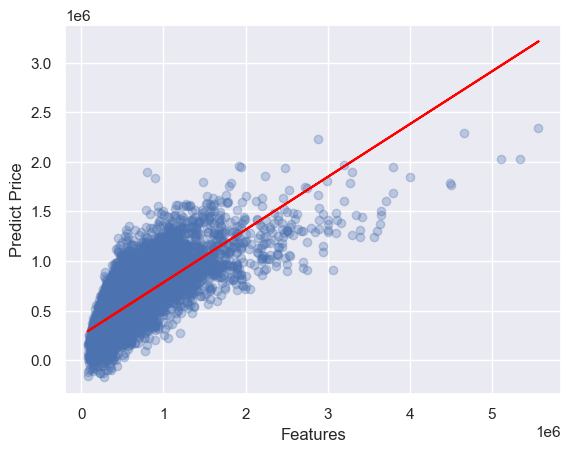

In [27]:
#visualization
plt.scatter(x=y_train, y=y_lm2_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lm2_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'red')
plt.ylabel('Predict Price')
plt.xlabel('Features')